In [ ]:
#import libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.python import keras
from tensorflow.python.keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from tensorflow.keras import layers 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
 #Load up data and show.
 df = pd.read_csv('/content/drive/MyDrive/CS7-Final/final_project(5).csv')
 df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


Random forest and Neural network

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [ ]:
df['x24'].value_counts() 

asia       138965
euorpe      16538
america      4469
Name: x24, dtype: int64

In [ ]:
df['x29'].value_counts()

July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
Dev           23
January        9
Name: x29, dtype: int64

In [ ]:
df['x29'] = df['x29'].replace(['July'], 'Jul')
df['x29'] = df['x29'].replace(['sept.'], 'Sep')
df['x29'] = df['x29'].replace(['Dev'], 'Dec')
df['x29'] = df['x29'].replace(['January'], 'Jan')

In [ ]:
df['x30'].value_counts()

wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64

In [ ]:
df['x30'] = df['x30'].replace(['wednesday'], 'wed')
df['x30'] = df['x30'].replace(['thurday'], 'thu')
df['x30'] = df['x30'].replace(['tuesday'], 'tue')
df['x30'] = df['x30'].replace(['friday'], 'fri')
df['x30'] = df['x30'].replace(['monday'], 'mon')

In [ ]:
df['x32'].value_counts()

0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64

In [ ]:
df['x32'] = df['x32'].astype(str)

In [ ]:
df['x32'] = df['x32'].str.replace('%', '')

df['x32'].head()

0      0.0
1    -0.02
2    -0.01
3     0.01
4     0.01
Name: x32, dtype: object

In [ ]:
df['x32'] = df['x32'].astype('float64')

In [ ]:
df['x37'].value_counts()

$-311.26     6
$-336.77     6
$237.4       6
$72.42       6
$341.26      6
            ..
$-505.21     1
$770.07      1
$74.62       1
$-1082.96    1
$-1229.34    1
Name: x37, Length: 129198, dtype: int64

In [ ]:
df['x37'] = df['x37'].astype(str)

In [ ]:
df['x37'] = df['x37'].str.replace('$', '')

df['x37'].head()

<ipython-input-10-7a1d49381926>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['x37'] = df['x37'].str.replace('$', '')


0     1313.96
1     1962.78
2      430.47
3    -2366.29
4     -620.66
Name: x37, dtype: object

In [ ]:
df['x37'] = df['x37'].astype('float64')

In [ ]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df

,column_name,percent_missing
y,y,0.000000
x8,x8,0.013125
x25,x25,0.013750
x37,x37,0.014375
x39,x39,0.014375
x1,x1,0.015625
x0,x0,0.016250
x16,x16,0.016250
x42,x42,0.016250
x4,x4,0.016250


In [ ]:
df.shape

(160000, 51)

In [ ]:
#No column has more than 3% can either drop or use mean/median?
#will go with median fill  
#Maybe leave it?

def func(df):
    df = df.copy()
    for col in df:
        # select only integer or float dtypes
        if df[col].dtype in ("int", "float"):
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

df = func(df)

In [ ]:
df['x24'] = df['x24'].fillna('unknown')
df['x29'] = df['x29'].fillna('unknown')
df['x30'] = df['x30'].fillna('unknown')

In [ ]:
category = df.select_dtypes(exclude='number')
category.head(5)

,x24,x29,x30
0,euorpe,Jul,tue
1,asia,Aug,wed
2,asia,Jul,wed
3,asia,Jul,wed
4,asia,Jul,tue


In [ ]:

cat = OneHotEncoder().fit_transform(category)
cat

<160000x23 sparse matrix of type '<class 'numpy.float64'>'
	with 480000 stored elements in Compressed Sparse Row format>

In [ ]:
cat2 = pd.DataFrame.sparse.from_spmatrix(cat)

In [ ]:
numeric = df.select_dtypes(include='number')
numeric.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [ ]:
frames = [cat2,numeric]

df2 = pd.concat(frames)

df2.shape

(320000, 71)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 159999
Data columns (total 71 columns):
 #   Column  Non-Null Count   Dtype             
---  ------  --------------   -----             
 0   0       160000 non-null  Sparse[float64, 0]
 1   1       160000 non-null  Sparse[float64, 0]
 2   2       160000 non-null  Sparse[float64, 0]
 3   3       160000 non-null  Sparse[float64, 0]
 4   4       160000 non-null  Sparse[float64, 0]
 5   5       160000 non-null  Sparse[float64, 0]
 6   6       160000 non-null  Sparse[float64, 0]
 7   7       160000 non-null  Sparse[float64, 0]
 8   8       160000 non-null  Sparse[float64, 0]
 9   9       160000 non-null  Sparse[float64, 0]
 10  10      160000 non-null  Sparse[float64, 0]
 11  11      160000 non-null  Sparse[float64, 0]
 12  12      160000 non-null  Sparse[float64, 0]
 13  13      160000 non-null  Sparse[float64, 0]
 14  14      160000 non-null  Sparse[float64, 0]
 15  15      160000 non-null  Sparse[float64, 0]
 16  16

In [ ]:
#Count values in label
df2['y'].value_counts()

0.0    95803
1.0    64197
Name: y, dtype: int64

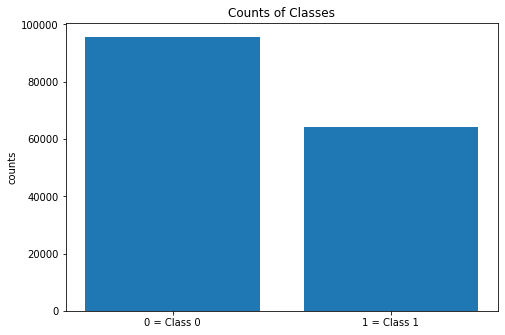

In [ ]:
#class 1 misclassification is $100 penalty, class 0 misclassification is $20 penalty
#Should downsample for more accuracy
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ["0 = Class 0", "1 = Class 1"]
ax.bar(labels,df2["y"].value_counts())
plt.ylabel("counts")
plt.title('Counts of Classes')
plt.show()

In [ ]:
#code to downsample class 1
# Separate majority and minority classes
from sklearn.utils import resample

df_class0 = df2[df2['y']==0]
df_class1 = df2[df2['y']==1]
 
# Downsample majority class
class0_downsampled = resample(df_class0, 
                                 replace=False,    # sample without replacement
                                 n_samples=64197,     # to match minority class
                                 random_state=444) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([class0_downsampled, df_class1])
 
# Display new class counts
df_downsampled['y'].value_counts()

0.0    64197
1.0    64197
Name: y, dtype: int64

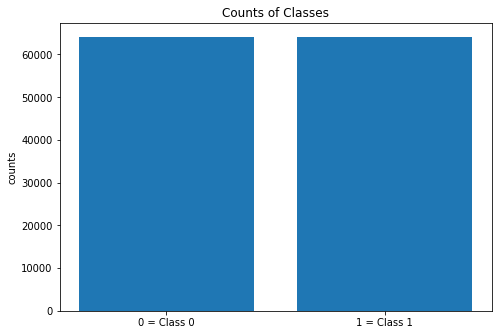

In [ ]:
#class 1 misclassification is $100 penalty, class 0 misclassification is $20 penalty
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ["0 = Class 0", "1 = Class 1"]
ax.bar(labels,df_downsampled["y"].value_counts())
plt.ylabel("counts")
plt.title('Counts of Classes')
plt.show()

In [ ]:
#https://www.relataly.com/using-random-search-to-tune-the-hyperparameters-of-a-random-decision-forest-with-python/6875/#h-step-2-explore-the-data

In [ ]:
X=df_downsampled.loc[:,df_downsampled.columns !='y'] # Features
y=df_downsampled['y']  # Labels

In [ ]:
X = X.fillna(0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=444)

In [ ]:
# Define the Estimator and the Parameter Ranges
rf = RandomForestClassifier()
n_estimators = [50, 100, 200]
criterion=['gini', 'entropy', 'log_loss']
min_samples_split = [5, 10, 20, 50]
max_features = ['log2', 'sqrt']
number_of_iterations = 20


# Define the param distribution dictionary
param_distributions = dict(n_estimators = n_estimators,
                           criterion = criterion, 
                           min_samples_split=min_samples_split,
                           max_features=max_features)


In [ ]:
# Build the gridsearch
grid = RandomizedSearchCV(estimator=rf, 
                          param_distributions=param_distributions, 
                          n_iter=number_of_iterations)


In [ ]:
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best params: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings.

Best params: [0.90708299        nan        nan 0.91134926        nan 0.9015612
 0.89984072 0.90422329 0.91016355 0.90661797        nan        nan
        nan        nan 0.90038709 0.90758288 0.9077921  0.91107028
        nan        nan], using {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'sqrt', 'criterion': 'entropy'}


In [ ]:
best_model = grid_results.best_estimator_
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
#Classification Report

target_names = ['class 0', 'class 1']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.92      0.92      0.92     21336
     class 1       0.92      0.92      0.92     21035

    accuracy                           0.92     42371
   macro avg       0.92      0.92      0.92     42371
weighted avg       0.92      0.92      0.92     42371



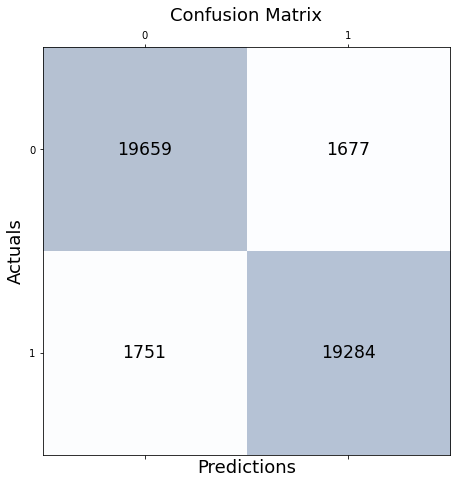

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
https://www.geeksforgeeks.org/hyperparameter-tuning-using-gridsearchcv-and-kerasclassifier/

In [ ]:

def build_clf(unit):
  # creating the layers of the NN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=unit, activation='tanh'))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=1, activation='linear'))
  ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann


In [ ]:
model=KerasClassifier(build_fn=build_clf)

<ipython-input-25-94990c6d4461>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=build_clf)


In [ ]:
params={'batch_size':[100, 20, 50, 25, 32], 
        'nb_epoch':[200, 100, 300, 400],
        'unit':[5,6, 10, 11, 12, 15],
           
        }
gs=GridSearchCV(estimator=model, param_grid=params, cv=10)
# now fit the dataset to the GridSearchCV object. 
fit = gs.fit(X_train, y_train)

4302/4302 [==============================] - 16s 4ms/step - loss: 1.7652 - accuracy: 0.5495


In [ ]:
best_params=fit.best_params_
accuracy=fit.best_score_

In [ ]:
best_params

{'batch_size': 20, 'nb_epoch': 200, 'unit': 15}

In [ ]:
accuracy

0.6489305555820465

In [ ]:
Unit = 15

# creating the layers of the NN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=15, activation='tanh'))
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [ ]:
model=KerasClassifier(build_fn=ann, batch_size = 20, nb_epoch = 200)

<ipython-input-36-547324f8013c>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=ann, batch_size = 20, nb_epoch = 200)


In [ ]:
model.fit(X_train, y_train)

ValueError: ignored